In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import time
%matplotlib inline

Blur 0.0018641948699951172 segundos
(350, 735) [[  0   8   0 ...   0   0   0]
 [ 54  47  22 ...  51  51  51]
 [104 107  71 ...  55  55  55]
 ...
 [  2   6  12 ...   4   3   2]
 [  1   1   2 ...   4   3   1]
 [  0   0   0 ...   3   2   0]]
0.0010268317 1.0
[[[0.5        1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.5        1.         1.        ]
  [1.         1.         1.        ]
  [0.5        1.         1.        ]]

 [[0.75       1.         1.        ]
  [0.8220619  1.         1.        ]
  [0.86278135 1.         1.        ]
  ...
  [0.25171131 1.         1.        ]
  [0.24486777 1.         1.        ]
  [0.25       1.         1.        ]]

 [[0.75       1.         1.        ]
  [0.84236109 1.         1.        ]
  [0.89106226 1.         1.        ]
  ...
  [0.25318268 1.         1.        ]
  [0.24363722 1.         1.        ]
  [0.25       1.         1.        ]]

 ...

 [[0.25       1.         1.        ]
  [0.310559

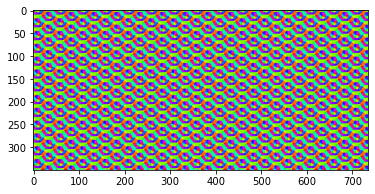

In [2]:
img = cv.imread('TP2/metalgrid.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Suavizado Gaussiano
#====================
start = time.time()

blur = cv.GaussianBlur(gray,(5,5),0)

elapsed = time.time()-start
print('Blur {} segundos'.format(elapsed))

# Gradientes
#===========
start = time.time()

# Aplicamos Sobelx en 'float32' y luego convertimos de nuevo a 8-bit para evitar overflow
sobelx_64 = cv.Sobel(blur,cv.CV_32F,1,0,ksize=3)
absx_64 = np.absolute(sobelx_64)
sobelx_8u1 = absx_64/absx_64.max()*255
sobelx_8u = np.uint8(sobelx_8u1)

# De igual modo para Sobely
sobely_64 = cv.Sobel(blur,cv.CV_32F,0,1,ksize=3)
absy_64 = np.absolute(sobely_64)
sobely_8u1 = absy_64/absy_64.max()*255
sobely_8u = np.uint8(sobely_8u1)

# De los gradiente calculamos Magnitud y lo pasamos a 8-bit (Opcional)
mag = np.hypot(sobelx_8u, sobely_8u)
mag = mag/mag.max()*255
mag = np.uint8(mag)

# Encontramos la Dirección y la pasamos a grados
theta = np.arctan2(sobely_64, sobelx_64)
angle = np.rad2deg(theta)

print(mag.shape, mag)
angle = (angle+180)/360
print(np.min(angle), np.max(angle))

def grados_hsv(array):
    new_array = []
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            new_array.append([array[i,j],1,1])
    return np.array(new_array).reshape(array.shape[0], array.shape[1],3)

print(grados_hsv(angle), grados_hsv(angle).shape)

# plt.hsv(grados_hsv(angle))

from matplotlib.colors import hsv_to_rgb
rgb = hsv_to_rgb(grados_hsv(angle))

plt.imshow(rgb)
plt.show()